# Ekstraksi Kata

## Import library/package yang dibutuhkan

In [1]:
import pandas as pd
import re

- Pandas adalah library open-source yang ditulis dalam bahasa pemrograman Python untuk analisis data dan manipulasi data. Dikembangkan oleh Wes McKinney, Pandas menyediakan struktur data yang efisien dan mudah digunakan untuk memanipulasi dan menganalisis data numerik dan tabular. Pandas sangat populer di kalangan data scientist, analis data, dan pengembang perangkat lunak karena kemudahan penggunaannya dan dukungan yang luas dalam ekosistem Python

- re adalah library Python yang menyediakan dukungan untuk ekspresi reguler (regular expressions). Ekspresi reguler adalah urutan karakter yang membentuk pola pencarian. Modul re memungkinkan pencocokkan pola dengan string dan melakukan berbagai operasi seperti pencarian, pencocokan, dan manipulasi string berdasarkan pola tertentu.

## Load data

Memanggil dataset yang akan digunakan dan ditampilkan dalam bentuk dataframe

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dennywr/cobaprosaindata/main/kalimat.csv')

In [3]:
df = pd.DataFrame(data)
df

,isi
0,KPU telah mengubah format debat Capres-Cawapres.
1,"Ganjar Pranowo, seorang tokoh politik, menyata..."
2,Ganjar Pranowo juga menekankan bahwa Sumber Da...
3,Ada kekhawatiran bahwa pemanggilan Kades dapat...
4,Partai Perindo menggelar Shalawat Persatuan In...
5,Ada kecurigaan bahwa KPU mungkin diintervensi ...
6,Ganjar Pranowo dinilai sebagai sosok pemimpin ...
7,Ganjar Pranowo mendapatkan dukungan dari Gen Z...
8,Sandiaga Uno memberikan tips sukses untuk gene...
9,Ada pendapat bahwa politik di Indonesia saat i...


In [4]:
df['isi'] = df['isi'].fillna('').astype(str)

## Preprocessing

Preprocessing merupakan serangkaian langkah atau tahapan yang dilakukan untuk membersihkan, merapihkan, dan mengubah data teks mentah menjadi bentuk yang lebih sesuai untuk analisis atau pemodelan. Proses ini penting karena data teks seringkali datang dalam bentuk yang tidak terstruktur dan memerlukan persiapan khusus sebelum dapat digunakan secara efektif

- Hapus karakter spesial pada teks

> Karakter spesial adalah karakter yang memiliki makna khusus seperti : / $ |




In [5]:
def removeSpecialText (text):
  text = text.replace('\\t',"").replace('\\n',"").replace('\\u',"").replace('\\',"").replace('None',"")
  text = text.encode('ascii', 'replace').decode('ascii')
  return text.replace("http://"," ").replace("https://", " ")
df['isi'] = df['isi'].apply(removeSpecialText)
df['isi'].head(10)

0     KPU telah mengubah format debat Capres-Cawapres.
1    Ganjar Pranowo, seorang tokoh politik, menyata...
2    Ganjar Pranowo juga menekankan bahwa Sumber Da...
3    Ada kekhawatiran bahwa pemanggilan Kades dapat...
4    Partai Perindo menggelar Shalawat Persatuan In...
5    Ada kecurigaan bahwa KPU mungkin diintervensi ...
6    Ganjar Pranowo dinilai sebagai sosok pemimpin ...
7    Ganjar Pranowo mendapatkan dukungan dari Gen Z...
8    Sandiaga Uno memberikan tips sukses untuk gene...
9    Ada pendapat bahwa politik di Indonesia saat i...
Name: isi, dtype: object

- Hapus tanda baca pada teks

> Tanda baca adalah simbol atau karakter yang digunakan dalam penulisan untuk memberikan arti atau menandai struktur kalimat, misalnya . , ? !

In [6]:
def removePunctuation(text):
  text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
  return text
df['isi'] = df['isi'].apply(removePunctuation)
df['isi'].head(10)

0     KPU telah mengubah format debat Capres Cawapres 
1    Ganjar Pranowo  seorang tokoh politik  menyata...
2    Ganjar Pranowo juga menekankan bahwa Sumber Da...
3    Ada kekhawatiran bahwa pemanggilan Kades dapat...
4    Partai Perindo menggelar Shalawat Persatuan In...
5    Ada kecurigaan bahwa KPU mungkin diintervensi ...
6    Ganjar Pranowo dinilai sebagai sosok pemimpin ...
7    Ganjar Pranowo mendapatkan dukungan dari Gen Z...
8    Sandiaga Uno memberikan tips sukses untuk gene...
9    Ada pendapat bahwa politik di Indonesia saat i...
Name: isi, dtype: object

- Hapus angka pada teks

> Angka adalah simbol matematika yang digunakan untuk menyatakan nilai kuantitatif atau jumlah, misalnya 1, 2, 3, 4, 5, 6

In [7]:
def removeNumbers (text):
  return re.sub(r"\d+", "", text)
df['isi'] = df['isi'].apply(removeNumbers)
df['isi'].head(10)

0     KPU telah mengubah format debat Capres Cawapres 
1    Ganjar Pranowo  seorang tokoh politik  menyata...
2    Ganjar Pranowo juga menekankan bahwa Sumber Da...
3    Ada kekhawatiran bahwa pemanggilan Kades dapat...
4    Partai Perindo menggelar Shalawat Persatuan In...
5    Ada kecurigaan bahwa KPU mungkin diintervensi ...
6    Ganjar Pranowo dinilai sebagai sosok pemimpin ...
7    Ganjar Pranowo mendapatkan dukungan dari Gen Z...
8    Sandiaga Uno memberikan tips sukses untuk gene...
9    Ada pendapat bahwa politik di Indonesia saat i...
Name: isi, dtype: object

- Ubah semua huruf pada teks menjadi huruf kecil

> Untuk menghindari ambiguitas dan mempermudah pemrosesan teks, terutama dalam konteks perbandingan string dan pencarian teks. Dalam banyak kasus, case folding digunakan untuk mengurangi kompleksitas dan membuat perbandingan teks menjadi lebih konsisten (keseragaman)

In [8]:
def casefolding(Comment):
  Comment = Comment.lower()
  return Comment
df['isi'] = df['isi'].apply(casefolding)
df['isi'].head(10)

0     kpu telah mengubah format debat capres cawapres 
1    ganjar pranowo  seorang tokoh politik  menyata...
2    ganjar pranowo juga menekankan bahwa sumber da...
3    ada kekhawatiran bahwa pemanggilan kades dapat...
4    partai perindo menggelar shalawat persatuan in...
5    ada kecurigaan bahwa kpu mungkin diintervensi ...
6    ganjar pranowo dinilai sebagai sosok pemimpin ...
7    ganjar pranowo mendapatkan dukungan dari gen z...
8    sandiaga uno memberikan tips sukses untuk gene...
9    ada pendapat bahwa politik di indonesia saat i...
Name: isi, dtype: object

- Melakukan penghapusan stopwords

> Stopwords adalah kata-kata umum yang sering muncul dalam suatu teks dan dianggap kurang bermakna karena keberadaannya yang umum. Dalam pemrosesan teks dan analisis teks, stopwords biasanya dihapus dari teks untuk meningkatkan kualitas analisis. Contoh stopwords dalam bahasa Indonesia meliputi kata-kata seperti "yang", "dan", "di", "dari", dan sebagainya.

In [9]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
def removeStopwords(text):
    stop_words = set(stopwords.words('indonesian'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['isi'] = df['isi'].apply(removeStopwords)
df['isi'].head(10)

0            kpu mengubah format debat capres cawapres
1    ganjar pranowo tokoh politik kesiapannya skenario
2    ganjar pranowo menekankan sumber daya manusia ...
3    kekhawatiran pemanggilan kades disalahgunakan ...
4    partai perindo menggelar shalawat persatuan in...
5    kecurigaan kpu diintervensi terkait pembatalan...
6    ganjar pranowo dinilai sosok pemimpin solutif ...
7      ganjar pranowo dukungan gen z menyebutnya sosok
8    sandiaga uno tips sukses generasi muda kampany...
9    pendapat politik indonesia kekuasaan kesejahte...
Name: isi, dtype: object

In [11]:
finalResult = pd.DataFrame(df, columns=["isi"])
# finalResult

## Matriks Koherensi

Matriks koherensi (co-occurrence) adalah representasi matematis dari seberapa sering dua entitas muncul bersama-sama dalam suatu konteks atau sekelompok data. Entitas ini bisa berupa kata, dokumen, konsep, atau objek lainnya tergantung pada domain dan tujuan aplikasinya.

Dalam konteks pemrosesan bahasa alami, matriks co-occurrence sering kali digunakan untuk merepresentasikan hubungan antara kata-kata dalam suatu teks atau korpus. Matriks ini memberikan gambaran seberapa sering dua kata muncul bersama-sama dalam konteks yang sama dalam suatu dokumen atau koleksi dokumen.

Misalnya, jika kita memiliki kumpulan teks, kita dapat membuat matriks co-occurrence di mana setiap elemen M(i,j) dari matriks tersebut menunjukkan seberapa sering kata ke-i dan kata ke-j muncul bersama-sama.

> Penjelasan mengenai library yang diimport di bawah:

- word_tokenize adalah fungsi yang disediakan oleh NLTK (Natural Language Toolkit) untuk melakukan tokenisasi kata dalam sebuah teks. Tokenisasi kata adalah proses memecah sebuah teks menjadi kata-kata individu, yang disebut sebagai "token"

- itertools adalah bagian dari library Python yang menyediakan fungsi-fungsi untuk bekerja dengan iterator (objek yang dapat diulang). Fungsi combinations termasuk dalam modul ini dan berguna untuk menghasilkan semua kombinasi unik dari panjang tertentu dari sebuah iterable (seperti daftar atau string).

- numpy adalah library Python yang menyediakan dukungan untuk operasi numerik yang efisien, terutama pada manipulasi array dan matriks



In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from itertools import combinations
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fungsi build_cooccurrence_matrix digunakan untuk membangun matriks koherensi berdasarkan kemunculan kata dalam sebuah set kalimat, dengan memanfaatkan ukuran window (jendela) tertentu. Matriks koherensi ini merepresentasikan seberapa sering dua kata muncul bersama-sama dalam konteks yang ditentukan oleh window.

Alur kerja fungsi ini dimulai dengan melakukan iterasi melalui setiap kalimat dalam daftar kalimat yang diberikan. Untuk setiap kata dalam kalimat, fungsi menentukan jangkauan indeks sebagai "window" di sekitar kata tersebut. Kemudian, fungsi membentuk daftar kata-kata dalam window tersebut, menghapus kata saat ini dari konteks, dan melakukan iterasi pada setiap kata dalam konteks.

Selanjutnya, fungsi membangun dan memperbarui dictionary cooccurrence_dict, yang menyimpan matriks koherensi antara kata-kata. Jika kata-kata belum ada dalam dictionary, fungsi menginisialisasi array nol untuk masing-masing kata. Fungsi kemudian meningkatkan nilai dalam matriks koherensi untuk setiap pasangan kata yang muncul bersama-sama.

Dengan menggunakan pendekatan ini, fungsi build_cooccurrence_matrix menghasilkan matriks koherensi yang merefleksikan hubungan antara kata-kata dalam teks, dengan intensitas keterkaitan diukur oleh frekuensi kemunculan bersama dalam window yang ditentukan.

Nilai window_size menentukan jumlah kata di sebelah kiri dan kanan dari kata target yang akan dihitung untuk setiap kemunculan kata tersebut. window_size menunjukkan seberapa jauh kata dapat bersama-sama dalam kalimat untuk dihitung sebagai kemunculan bersama. Semakin besar nilai window_size, semakin luas konteks yang dipertimbangkan.

In [13]:
def cooccurrence_matrix(sentences, window_size):
    # Inisialisasi dictionary untuk menyimpan matriks koherensi antara kata-kata
    cooccurrence_dict = {}

    # Loop untuk setiap kalimat dalam daftar kalimat
    for sentence in sentences:
        # Tokenisasi kata-kata dalam kalimat dan ubah ke huruf kecil
        words = word_tokenize(sentence.lower())

        # Loop untuk setiap kata dalam kalimat bersama dengan indeksnya
        for i, word1 in enumerate(words):
            # Tentukan jangkauan indeks sebagai "window" di sekitar kata saat ini
            start = max(0, i - window_size)
            end = min(len(words), i + window_size + 1)

            # Buat daftar kata-kata dalam window dan hapus kata saat ini dari konteks
            context_words = words[start:end]
            context_words.remove(word1)

            # Loop untuk setiap kata dalam konteks
            for word2 in context_words:
                # Inisialisasi array nol jika kata belum ada dalam dictionary
                if word1 not in cooccurrence_dict:
                    cooccurrence_dict[word1] = {}

                # Tingkatkan nilai dalam matriks koherensi untuk pasangan kata word1 dan word2
                if word2 in cooccurrence_dict[word1]:
                    cooccurrence_dict[word1][word2] += 1
                else:
                    cooccurrence_dict[word1][word2] = 1

    return cooccurrence_dict

# Ukuran jendela (window size)
window_size = 1

# Contoh kalimat singkat
# Mengumpulkan semua kalimat dari kolom 'kalimat' dalam dataframe
kalimat = [
    "Ini adalah contoh kalimat pertama",
    "Kalimat kedua adalah contoh yang berbeda",
]

#############

# # Mengumpulkan semua kalimat dari kolom 'kalimat' dalam dataframe
# kalimat = finalResult["isi"]

# # Membuat vocabulary dari kata-kata unik dalam kalimat
# vocabulary = list(set(word_tokenize(' '.join(kalimat).lower())))

# Membangun matriks koherensi dengan ukuran window
cooccurrence_matrix_result = cooccurrence_matrix(kalimat, window_size)
cooccurrence_matrix_result


{'ini': {'adalah': 1},
 'adalah': {'ini': 1, 'contoh': 2, 'kedua': 1},
 'contoh': {'adalah': 2, 'kalimat': 1, 'yang': 1},
 'kalimat': {'contoh': 1, 'pertama': 1, 'kedua': 1},
 'pertama': {'kalimat': 1},
 'kedua': {'kalimat': 1, 'adalah': 1},
 'yang': {'contoh': 1, 'berbeda': 1},
 'berbeda': {'yang': 1}}

> Dengan menggunakan matriks koherensi ini, kita dapat melihat seberapa sering setiap pasangan kata muncul bersama-sama dalam konteks jendela yang ditentukan. Semakin tinggi nilai dalam matriks, semakin erat hubungan antara dua kata tersebut dalam konteks teks tersebut.

In [14]:
# DataFrame dari hasil matriks koherensi
cooccurrence_matrix_result_df = pd.DataFrame(cooccurrence_matrix_result, index=cooccurrence_matrix_result)
cooccurrence_matrix_result_df = cooccurrence_matrix_result_df.fillna(0).astype(int)

cooccurrence_matrix_result_df

,ini,adalah,contoh,kalimat,pertama,kedua,yang,berbeda
ini,0,1,0,0,0,0,0,0
adalah,1,0,2,0,0,1,0,0
contoh,0,2,0,1,0,0,1,0
kalimat,0,0,1,0,1,1,0,0
pertama,0,0,0,1,0,0,0,0
kedua,0,1,0,1,0,0,0,0
yang,0,0,1,0,0,0,0,1
berbeda,0,0,0,0,0,0,1,0


## Graph (NetworkX)

Graph adalah jenis struktur data umum yang susunan datanya tidak berdekatan satu sama lain (non-linier). Graph terdiri dari kumpulan simpul berhingga untuk menyimpan data dan antara dua buah simpul terdapat hubungan saling keterkaitan. Simpul pada graph disebut dengan verteks (V), sedangkan sisi yang menghubungkan antar verteks disebut edge (E). Graf digunakan untuk merepresentasikan objek-objek diskrit dan hubungan antara objek-objek tersebut. Dalam bahasa sehari-hari, sebuah graf adalah himpunan dari objek-objek yang dinamakan titik, simpul, atau sudut dihubungkan oleh penghubung yang dinamakan garis atau sisi.

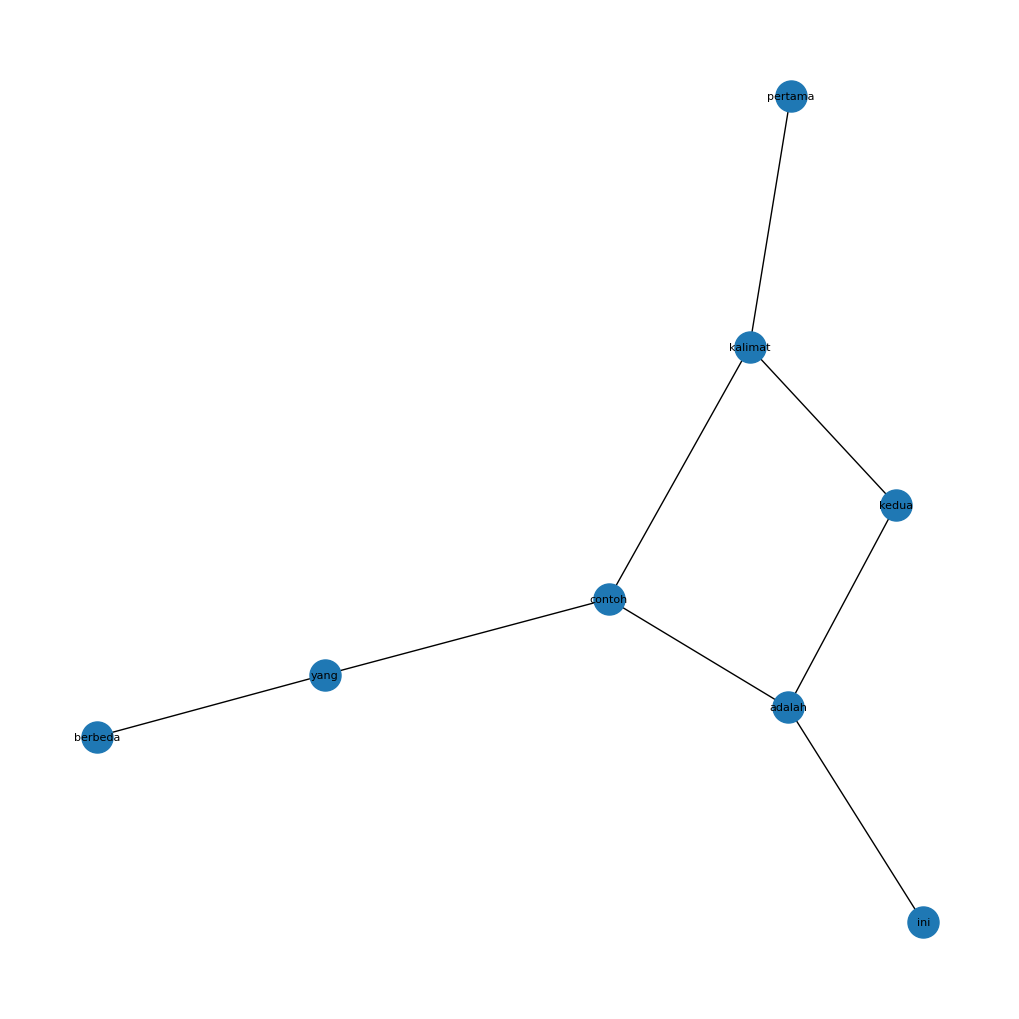

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat objek grafik
G = nx.Graph()

# Menambahkan simpul dan tepi ke grafik
for i in range(len(cooccurrence_matrix_result_df)):
    for j in range(i+1, len(cooccurrence_matrix_result_df)):
        if cooccurrence_matrix_result_df.iloc[i, j] > 0.5:
            G.add_edge(cooccurrence_matrix_result_df.columns[i], cooccurrence_matrix_result_df.columns[j], weight=cooccurrence_matrix_result_df.iloc[i, j])

# Menggambar grafik
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=500, font_color='black')
plt.show()


## Closeness Centrality

Closeness Centrality adalah ukuran sentralitas dalam jaringan, dihitung sebagai balikan dari jumlah panjang jalur terpendek antara simpul dan semua simpul lainnya dalam grafik. Dengan kata lain, semakin sentral sebuah simpul, semakin dekat ia dengan semua simpul lainnya. Closeness Centrality digunakan untuk mendeteksi simpul yang mampu menyebarkan informasi dengan sangat efisien melalui grafik. Berikut merupakan rumus untuk menghitung closeness centrality:


$C(u) = \frac{1}{\sum_{v=1}^{n} d(u, v)}$


Dimana:

- $C(u)$ adalah closeness centrality dari node $u$


- $d(u,v)$  adalah jarak terpendek antara node $u$ dan $v$

In [16]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Mencetak hasil
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {closeness}")

Node ini: Closeness Centrality = 0.3684210526315789
Node adalah: Closeness Centrality = 0.5384615384615384
Node contoh: Closeness Centrality = 0.6363636363636364
Node kedua: Closeness Centrality = 0.4666666666666667
Node kalimat: Closeness Centrality = 0.5384615384615384
Node yang: Closeness Centrality = 0.4666666666666667
Node pertama: Closeness Centrality = 0.3684210526315789
Node berbeda: Closeness Centrality = 0.3333333333333333


### 3 kata teratas dari nilai Closeness Centrality tertinggi:

In [17]:
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Tampilkan 3 kata teratas dari nilai tertinggi
top_3_nodes = sorted_closeness[:3]

results = []
for rank, (node, closeness) in enumerate(top_3_nodes, start=1):
  results.append((node, closeness))
df = pd.DataFrame(results, columns=['Node', 'Closeness Centrality'])
# df.set_index('Node', inplace=True)
df.index += 1
df

,Node,Closeness Centrality
1,contoh,0.636364
2,adalah,0.538462
3,kalimat,0.538462


## Pagerank

PageRank bekerja dengan cara menghitung jumlah dan kualitas tautan yang masuk ke suatu simpul. Jika sebuah simpul memiliki banyak tautan yang masuk dari simpul lain yang penting, maka simpul tersebut akan dianggap penting. Berikut merupakan rumus untuk menghitung pagerank:


$PR(A) = (1-d) + d \left( \frac{PR(T1)}{C(T1)} + \frac{PR(T2)}{C(T2)} + ... + \frac{PR(Tn)}{C(Tn)} \right)$


Dimana:


- $PR(A)$ adalah PageRank dari halaman $A$.

- $PR(T1)$ sampai $PR(Tn)$ adalah PageRank dari halaman $T1$ sampai $Tn$ yang mengarah ke halaman $A$ (yaitu halaman yang memiliki tautan ke $A$).

- $C(T1)$ sampai $C(Tn)$ adalah jumlah tautan keluar dari halaman $T1$ sampai $Tn$.

- $d$ adalah faktor damping, yang biasanya diatur ke 0.85.

=> Berikut ini merupakan link dari contoh perhitungan manual Pagerank : [klik di sini](https://docs.google.com/spreadsheets/d/1gBKucZw2LPN16CquXfPdSySzrow9mNZlbBElaTeDcuU/edit?usp=sharing)

In [18]:
# Menghitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)

for node, rank in pagerank.items():
    print(f"Node {node}: PageRank = {rank}")

Node ini: PageRank = 0.062164294572446904
Node adalah: PageRank = 0.20430079972582826
Node contoh: PageRank = 0.2037861984422184
Node kedua: PageRank = 0.10847885535091573
Node kalimat: PageRank = 0.16346183346268384
Node yang: PageRank = 0.12210040914858214
Node pertama: PageRank = 0.06506456077846882
Node berbeda: PageRank = 0.07064304851885578


### 3 kata teratas dari nilai Pagerank tertinggi:

In [19]:
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Tampilkan 3 kata teratas dari nilai tertinggi
top_3_nodes = sorted_pagerank[:3]

results = []
for rank, (node, pagerank) in enumerate(top_3_nodes, start=1):
  results.append((node, pagerank))
df = pd.DataFrame(results, columns=['Node', 'Pagerank'])
# df.set_index('Node', inplace=True)
df.index += 1
df

,Node,Pagerank
1,adalah,0.204301
2,contoh,0.203786
3,kalimat,0.163462


## Eignvector Centrality

Eigenvector Centrality adalah ukuran sentralitas dalam teori graf, yang memberikan skor relatif kepada semua simpul dalam jaringan berdasarkan konsep bahwa koneksi ke simpul dengan skor tinggi berkontribusi lebih banyak terhadap skor simpul yang dipertanyakan daripada koneksi yang sama ke simpul dengan skor rendah. Dengan kata lain, simpul dengan Eigenvector Centrality yang tinggi berarti bahwa simpul tersebut terhubung ke banyak simpul yang juga memiliki skor tinggi. Berikut merupakan rumus untuk menghitung nilai eignvector centrality:


$x_v = \frac{1}{\lambda} \sum_{t \in M(v)} x_t$

Dimana:

- $x_v$ adalah eigenvector centrality dari simpul $v$.

- $M(v)$ adalah set simpul yang berdekatan dengan $v$

- $x_t$​ adalah eigenvector centrality dari simpul $t$.

- λ adalah konstanta.

In [20]:
# Menghitung eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=101)


# Mencetak hasil
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: Eigenvector Centrality = {centrality}")

Node ini: Eigenvector Centrality = 0.19705066578012848
Node adalah: Eigenvector Centrality = 0.4647042996438052
Node contoh: Eigenvector Centrality = 0.504758547473677
Node kedua: Eigenvector Centrality = 0.3941013315602299
Node kalimat: Eigenvector Centrality = 0.4647042996438053
Node yang: Eigenvector Centrality = 0.26095943707276287
Node pertama: Eigenvector Centrality = 0.1970506657801285
Node berbeda: Eigenvector Centrality = 0.11065721591347429


### 3 kata teratas dari nilai Eignvector Centrality tertinggi:

In [21]:
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Tampilkan 3 kata teratas dari nilai tertinggi
top_3_nodes = sorted_eigenvector[:3]

results = []
for rank, (node, eignvector) in enumerate(top_3_nodes, start=1):
  results.append((node, eignvector))
df = pd.DataFrame(results, columns=['Node', 'Eignvector Centrality'])
# df.set_index('Node', inplace=True)
df.index += 1
df

,Node,Eignvector Centrality
1,contoh,0.504759
2,kalimat,0.464704
3,adalah,0.464704


## Betweeness Centrality

Betweenness Centrality adalah ukuran sentralitas dalam teori graf berdasarkan jalur terpendek. Betweenness Centrality mewakili sejauh mana simpul berdiri di antara satu sama lain. Betweenness Centrality sering digunakan untuk menemukan simpul yang berfungsi sebagai jembatan dari satu bagian grafik ke bagian lain. Berikut merupakan rumus untuk menghitung nilai betweenness centrality:

$C_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$

Dimana:

- $C_B​(v)$ adalah betweenness centrality dari simpul $v$

- $V$ adalah set simpul dalam jaringan

- $σ(s,t)$ adalah jumlah shortest path dari simpul $s$ ke simpul $t$

- $σ(s,t∣v)$ adalah jumlah shortest path dari simpul $s$ ke simpul $t$ yang melewati simpul $v$

In [22]:
# Menghitung betwenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Mencetak hasil
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: Betweenness Centrality = {centrality}")

Node ini: Betweenness Centrality = 0.0
Node adalah: Betweenness Centrality = 0.3571428571428571
Node contoh: Betweenness Centrality = 0.5714285714285714
Node kedua: Betweenness Centrality = 0.09523809523809523
Node kalimat: Betweenness Centrality = 0.3571428571428571
Node yang: Betweenness Centrality = 0.2857142857142857
Node pertama: Betweenness Centrality = 0.0
Node berbeda: Betweenness Centrality = 0.0


### 3 kata teratas dari nilai Betweenness Centrality tertinggi:

In [23]:
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Tampilkan 3 kata teratas dari nilai tertinggi
top_3_nodes = sorted_betweenness[:3]

results = []
for rank, (node, betweenness) in enumerate(top_3_nodes, start=1):
  results.append((node, betweenness))
df = pd.DataFrame(results, columns=['Node', 'Betweenness Centrality'])
# df.set_index('Node', inplace=True)
df.index += 1
df

,Node,Betweenness Centrality
1,contoh,0.571429
2,adalah,0.357143
3,kalimat,0.357143
